# Importing libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Importing dataset

In [2]:
# read the data
data=pd.read_csv("Data-Collisions.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

# Quick view of the descriptive statistics of the data

In [4]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


# Data cleaning

Deleting columns that we won't be using for modelling and prediction

#There are some columns in the dataset that are not relevant to the question at hand, so these columns will be dropped

#OBJECTID- ESRI unique identifier

#INCKEY- A unique key for the incident

#COLDETKEY-Secondary key for the incident

#REPORTNO

#STATUS

#INTKEY-Key that corresponds to the intersection associated with a collision

#LOCATION-Description of the general location of the collision

#EXCEPTRSNCODE

#EXCEPTRSNDESC

#SEVERITYCODE-Duplicate column of the target variable

#SEVERITYDESC-Provides the same information as Severitycode

#PERSONCOUNT-Quick examination showed skewed data.

#SDOT_COLCODE-A code given to the collision by SDOT.

#SDOT_COLDESC-A description of the collision corresponding to the collision code.

#SDOTCOLNUM-A number given to the collision by SDOT.

#INCDATE-Deleting column as has similar info to INCTTM

#PEDROWNOTGRNT-Whether or not the pedestrian right of way was not granted. (Y/N)

#PEDCOUNT and PEDCYCOUNT variables are dropped as they are highly correlated with the collision data

In [5]:
data.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','PEDROWNOTGRNT','SDOTCOLNUM'],axis=1,inplace=True)

In [6]:
data['INATTENTIONIND']=data['INATTENTIONIND'].replace({np.nan:'N'})#Coverting nan value to 'N'

In [7]:
data['SPEEDING']=data['SPEEDING'].replace({np.nan:'N'})#Coverting nan value to 'N'

In [8]:
data['UNDERINFL'] = data['UNDERINFL'].replace({'0':'N'})#Coverting boolean value to 'N'
data['UNDERINFL'] = data['UNDERINFL'].replace({'1':'Y'})#Coverting boolean value to 'Y'

In [9]:
# checking the percentage of missing values in each variable
data.isnull().sum()/len(data)*100

SEVERITYCODE      0.000000
X                 2.739979
Y                 2.739979
OBJECTID          0.000000
INCKEY            0.000000
COLDETKEY         0.000000
REPORTNO          0.000000
STATUS            0.000000
ADDRTYPE          0.989351
LOCATION          1.375126
SEVERITYCODE.1    0.000000
SEVERITYDESC      0.000000
COLLISIONTYPE     2.519096
PERSONCOUNT       0.000000
PEDCOUNT          0.000000
PEDCYLCOUNT       0.000000
VEHCOUNT          0.000000
INCDATE           0.000000
INCDTTM           0.000000
JUNCTIONTYPE      3.251093
SDOT_COLCODE      0.000000
SDOT_COLDESC      0.000000
INATTENTIONIND    0.000000
UNDERINFL         2.508822
WEATHER           2.610018
ROADCOND          2.574574
LIGHTCOND         2.655736
SPEEDING          0.000000
ST_COLCODE        0.009246
ST_COLDESC        2.519096
SEGLANEKEY        0.000000
CROSSWALKKEY      0.000000
HITPARKEDCAR      0.000000
dtype: float64

In [10]:
# saving missing values in a variable
a = data.isnull().sum()/len(data)*100
# saving column names in a variable
variables = data.columns
variable = [ ]
for i in range(0,32):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

In [11]:
data['WEATHER']= data['WEATHER'].replace('Unknown',np.nan)#Coverting unknown values to nan
data['WEATHER']= data['WEATHER'].replace('Other',np.nan)#Coverting unknown values to nan
data['ROADCOND']= data['ROADCOND'].replace('Unknown',np.nan)#Coverting unknown values to nan
data['LIGHTCOND']= data['LIGHTCOND'].replace('Unknown',np.nan)#Coverting unknown values to nan
data['LIGHTCOND']= data['LIGHTCOND'].replace('Other',np.nan)#Coverting unknown values to nan
data['COLLISIONTYPE']= data['COLLISIONTYPE'].replace('Other',np.nan)#Coverting unknown values to nan
data['JUNCTIONTYPE']= data['JUNCTIONTYPE'].replace('Unknown',np.nan)#Coverting unknown values to nan
data['ROADCOND']= data['ROADCOND'].replace('Other',np.nan)#Coverting unknown values to nan

In [12]:
data['LOCATION'].unique()

array(['5TH AVE NE AND NE 103RD ST',
       'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N',
       '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST', ...,
       '47TH AVE SW AND SW 98TH ST', 'NE PARK RD AND NE RAVENNA WB BV',
       'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1'], dtype=object)

In [13]:
data['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', nan, 'Cycles', 'Rear Ended',
       'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'], dtype=object)

In [14]:
data['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Ramp Junction'], dtype=object)

In [15]:
data['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Snowing', 'Fog/Smog/Smoke',
       'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [16]:
data['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

In [17]:
data['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Dark - Unknown Lighting'], dtype=object)

In [18]:
data['ST_COLDESC'].unique()

array(['Entering at angle',
       'From same direction - both going straight - both moving - sideswipe',
       'One parked--one moving', 'From same direction - all others',
       'Vehicle Strikes Pedalcyclist', 'One car leaving driveway access',
       'From same direction - both going straight - one stopped - rear-end',
       'From opposite direction - all others', nan,
       'From opposite direction - one left turn - one straight',
       'Other object',
       'From same direction - both going straight - both moving - rear-end',
       'Fixed object',
       'From same direction - both going straight - one stopped - sideswipe',
       'Vehicle - Pedalcyclist', 'Vehicle going straight hits pedestrian',
       'One car leaving parked position',
       'One car entering driveway access',
       'Vehicle turning right hits pedestrian', 'Vehicle overturned',
       'From same direction - one right turn - one straight',
       'From same direction - one left turn - one straight',
   

In [19]:
#Dropping variables
data.drop(['ST_COLDESC','LOCATION'],axis=1,inplace=True)

In [20]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,SEVERITYCODE.1,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,2,...,N,N,Overcast,Wet,Daylight,N,10,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,1,...,N,N,Raining,Wet,Dark - Street Lights On,N,11,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,1,...,N,N,Overcast,Dry,Daylight,N,32,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,1,...,N,N,Clear,Dry,Daylight,N,23,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,2,...,N,N,Raining,Wet,Daylight,N,10,0,0,N


# Accident severity map

In [21]:
#The X and Y fields represent the longitude and latitude of the collisions. 

import folium
from folium.plugins import MarkerCluster
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [22]:
#Dropping rows that have nan or missing values

data.dropna(how="any", inplace=True)

In [23]:
#Let’s check whether all the missing values have been filled:
data.isnull().sum()/len(data)*100

SEVERITYCODE      0.0
X                 0.0
Y                 0.0
OBJECTID          0.0
INCKEY            0.0
COLDETKEY         0.0
REPORTNO          0.0
STATUS            0.0
ADDRTYPE          0.0
SEVERITYCODE.1    0.0
SEVERITYDESC      0.0
COLLISIONTYPE     0.0
PERSONCOUNT       0.0
PEDCOUNT          0.0
PEDCYLCOUNT       0.0
VEHCOUNT          0.0
INCDATE           0.0
INCDTTM           0.0
JUNCTIONTYPE      0.0
SDOT_COLCODE      0.0
SDOT_COLDESC      0.0
INATTENTIONIND    0.0
UNDERINFL         0.0
WEATHER           0.0
ROADCOND          0.0
LIGHTCOND         0.0
SPEEDING          0.0
ST_COLCODE        0.0
SEGLANEKEY        0.0
CROSSWALKKEY      0.0
HITPARKEDCAR      0.0
dtype: float64

In [24]:
data_final=data

In [25]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [26]:
data_final.drop(['X','Y','OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS','SEVERITYCODE.1', 'SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT','INCDATE','SDOT_COLCODE', 'SDOT_COLDESC','ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [27]:
data_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N
1,1,Block,Sideswipe,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,N
2,1,Block,Parked Car,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N,N
4,2,Intersection,Angles,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N,N
5,1,Intersection,Angles,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),N,N,Clear,Dry,Daylight,N,N


In [28]:
#We are all set. Now let’s calculate the variance of all the numerical variables.
data.var()

SEVERITYCODE    0.224517
VEHCOUNT        0.284046
dtype: float64

# #Casting the Data, Time and Hour column in date and time format

In [29]:
data_final['Date_Time']=pd.to_datetime(data_final['INCDTTM'])
data_final["Day"] = data_final['Date_Time'].map(lambda x: x.day)
data_final["Month"] = data_final['Date_Time'].map(lambda x: x.month)
data_final["Year"] = data_final['Date_Time'].map(lambda x: x.year)
data_final["Hour"] = data_final['Date_Time'].map(lambda x: x.hour)

In [30]:
#Deleting all the rows that have been casted to 0th hour, as some rows that doesn't have the time has been coverted to 0th hour as well. To avoid the false information gain because of the date to time converstion, deleting the rows with 0th hour.

data_final = data_final[data_final.Hour != 0]

In [31]:
data_final["Hour"].value_counts()

17    10438
16     9854
15     9290
14     8632
13     8140
12     8001
18     7622
8      6595
11     6464
9      6186
10     5653
19     5497
7      5110
20     4592
21     4180
22     3907
23     3100
6      2281
2      2210
1      2172
5      1049
3       909
4       678
Name: Hour, dtype: int64

In [32]:
data_final["Day"].value_counts()

15    4924
13    4776
20    4769
14    4738
28    4703
10    4691
11    4672
12    4668
23    4632
21    4622
22    4606
18    4596
19    4594
17    4565
26    4543
16    4532
27    4499
24    4367
25    4333
29    4283
30    4142
7     2714
31    2705
9     2685
5     2664
8     2659
1     2595
3     2584
6     2579
4     2564
2     2556
Name: Day, dtype: int64

In [33]:
data_final["Month"].value_counts()

10    11075
6     10714
5     10710
7     10674
3     10409
8     10291
1     10247
9     10209
4     10189
11    10090
12     9370
2      8582
Name: Month, dtype: int64

In [34]:
data_final["Year"].value_counts()

2015    8682
2016    8591
2017    8486
2014    8460
2018    7987
2010    7867
2005    7818
2012    7808
2006    7761
2013    7700
2007    7269
2011    7245
2019    7195
2008    6532
2004    6132
2009    6020
2020    1007
Name: Year, dtype: int64

In [35]:
#From INCDTTM column, we have extracted Date and Time column and then separated Day, Month, Year and Hour columns. Quick look at the number of unique values tells us that Day, Month and Year accident data is roughly equally distributed, so we can safely drop INCDTTM,Day,Month and year columns. There is a lot of variance in the accident severity in the column with hour of the day data, so we'll keep it.

data_final.drop(["INCDTTM","Date_Time","Day","Month","Year"], axis = 1,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
data_final.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,Hour
0,2,Intersection,Angles,2,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N,N,14
1,1,Block,Sideswipe,2,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,N,18
2,1,Block,Parked Car,3,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N,N,10
4,2,Intersection,Angles,2,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N,N,8
5,1,Intersection,Angles,2,At Intersection (intersection related),N,N,Clear,Dry,Daylight,N,N,17


In [37]:
data_final.corr()

,SEVERITYCODE,VEHCOUNT,Hour
SEVERITYCODE,1.000000,-0.128918,0.015776
VEHCOUNT,-0.128918,1.000000,-0.022070
Hour,0.015776,-0.022070,1.000000


In [38]:
df=data_final

# Checking the relationship between accident severity and the individual variables chosen for the model

In [39]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'HITPARKEDCAR', 'Hour'],
      dtype='object')

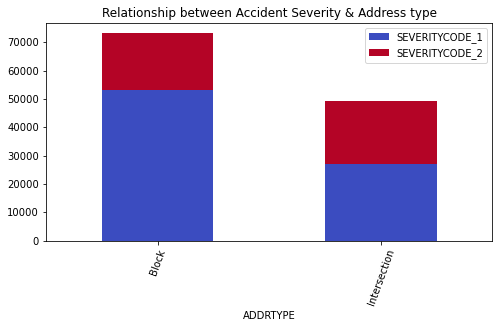

In [40]:
#ADDRTYPE
df_ADDRTYPE = df.filter(['ADDRTYPE','SEVERITYCODE'], axis=1)

df_ADDRTYPE1 = pd.concat([df_ADDRTYPE,pd.get_dummies(df_ADDRTYPE['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_1 = df_ADDRTYPE1.groupby('ADDRTYPE') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_1.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Address type'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

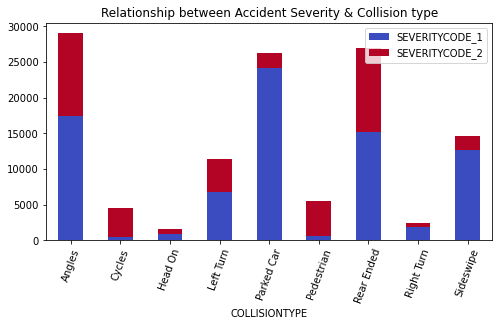

In [41]:
#COLLISIONTYPE
df_COLLISIONTYPE = df.filter(['COLLISIONTYPE','SEVERITYCODE'], axis=1)

df_COLLISIONTYPE1 = pd.concat([df_COLLISIONTYPE,pd.get_dummies(df_COLLISIONTYPE['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_2 = df_COLLISIONTYPE1.groupby('COLLISIONTYPE') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_2.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Collision type'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

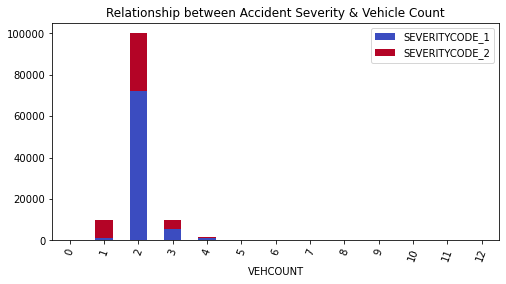

In [42]:
#VEHCOUNT
df_VEHCOUNT = df.filter(['VEHCOUNT','SEVERITYCODE'], axis=1)

df_VEHCOUNT1 = pd.concat([df_VEHCOUNT,pd.get_dummies(df_VEHCOUNT['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_14 = df_VEHCOUNT1.groupby('VEHCOUNT') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_14.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Vehicle Count'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

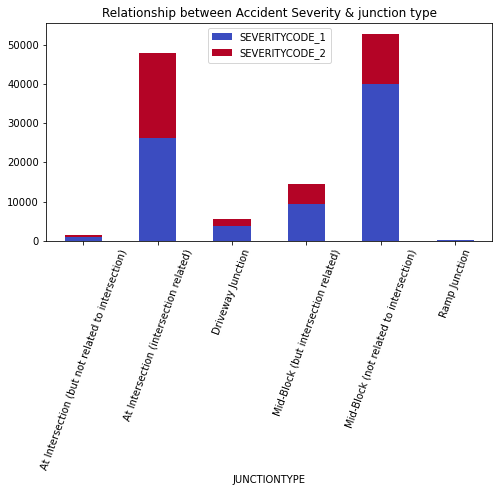

In [43]:
#JUNCTIONTYPE
df_JUNCTIONTYPE = df.filter(['JUNCTIONTYPE','SEVERITYCODE'], axis=1)

df_JUNCTIONTYPE1 = pd.concat([df_JUNCTIONTYPE,pd.get_dummies(df_JUNCTIONTYPE['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_3 = df_JUNCTIONTYPE1.groupby('JUNCTIONTYPE') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_3.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & junction type'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

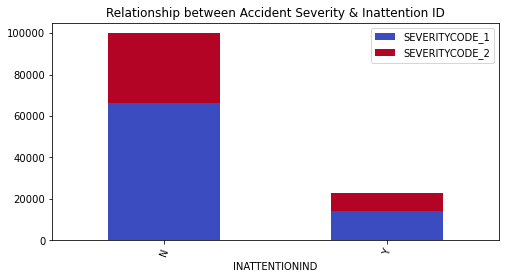

In [44]:
#INATTENTIONIND
df_INATTENTIONIND = df.filter(['INATTENTIONIND','SEVERITYCODE'], axis=1)

df_INATTENTIONIND1 = pd.concat([df_INATTENTIONIND,pd.get_dummies(df_INATTENTIONIND['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_4 = df_INATTENTIONIND1.groupby('INATTENTIONIND') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_4.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Inattention ID'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

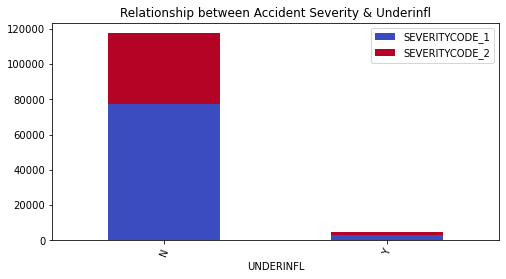

In [45]:
#UNDERINFL
df_UNDERINFL = df.filter(['UNDERINFL','SEVERITYCODE'], axis=1)

df_UNDERINFL1 = pd.concat([df_UNDERINFL,pd.get_dummies(df_UNDERINFL['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_5 = df_UNDERINFL1.groupby('UNDERINFL') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_5.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Underinfl'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

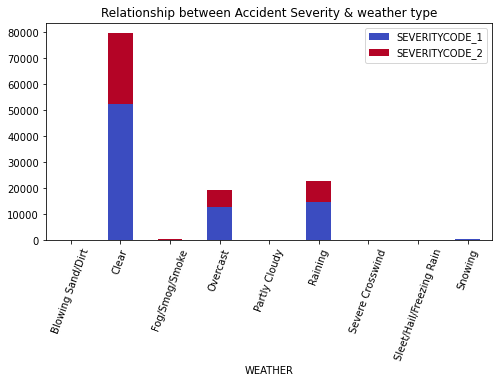

In [46]:
#WEATHER
df_WEATHER = df.filter(['WEATHER','SEVERITYCODE'], axis=1)

df_WEATHER1 = pd.concat([df_WEATHER,pd.get_dummies(df_WEATHER['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_6 = df_WEATHER1.groupby('WEATHER') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_6.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & weather type'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

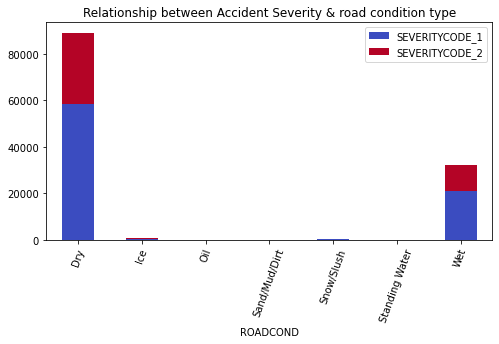

In [47]:
#ROADCOND
df_ROADCOND = df.filter(['ROADCOND','SEVERITYCODE'], axis=1)

df_ROADCOND1 = pd.concat([df_ROADCOND,pd.get_dummies(df_ROADCOND['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_7 = df_ROADCOND1.groupby('ROADCOND') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_7.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & road condition type'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

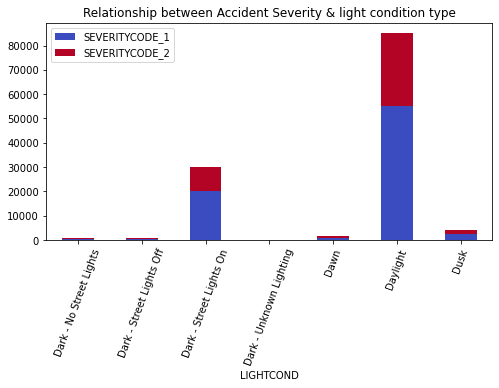

In [48]:
#LIGHCOND
df_LIGHTCOND = df.filter(['LIGHTCOND','SEVERITYCODE'], axis=1)

df_LIGHTCOND1 = pd.concat([df_LIGHTCOND,pd.get_dummies(df_LIGHTCOND['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_8 = df_LIGHTCOND1.groupby('LIGHTCOND') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_8.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & light condition type'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

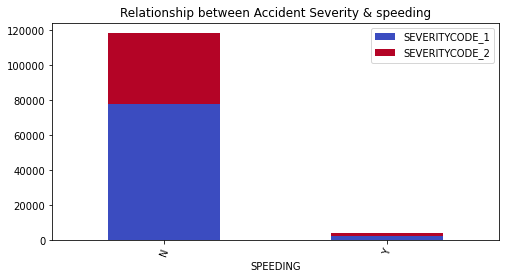

In [49]:
#SPEEDING
df_SPEEDING = df.filter(['SPEEDING','SEVERITYCODE'], axis=1)

df_SPEEDING1 = pd.concat([df_SPEEDING,pd.get_dummies(df_SPEEDING['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_9 = df_SPEEDING1.groupby('SPEEDING') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_9.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & speeding'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

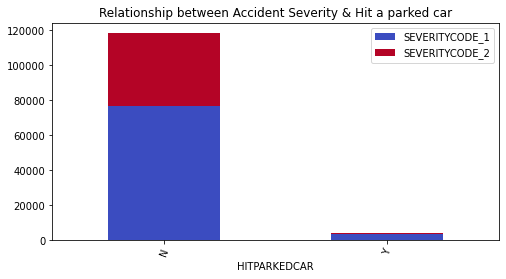

In [50]:
#HITPARKEDCAR
df_HITPARKEDCAR = df.filter(['HITPARKEDCAR','SEVERITYCODE'], axis=1)

df_HITPARKEDCAR1 = pd.concat([df_HITPARKEDCAR,pd.get_dummies(df_HITPARKEDCAR['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_10 = df_HITPARKEDCAR1.groupby('HITPARKEDCAR') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_10.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Hit a parked car'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

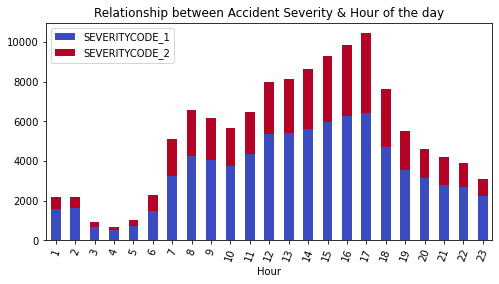

In [51]:
#HOUR
df_Hour = df.filter(['Hour','SEVERITYCODE'], axis=1)

df_Hour1 = pd.concat([df_Hour,pd.get_dummies(df_Hour['SEVERITYCODE'], prefix='SEVERITY')], axis=1)

df_grouped_11 = df_Hour1.groupby('Hour') \
  .apply(lambda x: pd.Series({
      'SEVERITYCODE_1'       : x['SEVERITY_1'].sum(),
      'SEVERITYCODE_2'       : x['SEVERITY_2'].sum()
  })
)

df_grouped_11.plot(kind='bar', stacked=True, title= 'Relationship between Accident Severity & Hour of the day'
                  , colormap= 'coolwarm',rot='70',figsize=(8,4))

# As majority of our data is categorical, the whole dataset except the target variable are converted to string type for feature selection.

In [52]:
df[['ADDRTYPE', 'COLLISIONTYPE','VEHCOUNT','JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING','HITPARKEDCAR','Hour']]=df[['ADDRTYPE', 'COLLISIONTYPE','VEHCOUNT','JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING','HITPARKEDCAR','Hour']].astype(str)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122560 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    122560 non-null  int64 
 1   ADDRTYPE        122560 non-null  object
 2   COLLISIONTYPE   122560 non-null  object
 3   VEHCOUNT        122560 non-null  object
 4   JUNCTIONTYPE    122560 non-null  object
 5   INATTENTIONIND  122560 non-null  object
 6   UNDERINFL       122560 non-null  object
 7   WEATHER         122560 non-null  object
 8   ROADCOND        122560 non-null  object
 9   LIGHTCOND       122560 non-null  object
 10  SPEEDING        122560 non-null  object
 11  HITPARKEDCAR    122560 non-null  object
 12  Hour            122560 non-null  object
dtypes: int64(1), object(12)
memory usage: 13.1+ MB


# Creating dummies for categorical variables

In [54]:
df = pd.get_dummies(data=df, columns=['ADDRTYPE', 'COLLISIONTYPE','VEHCOUNT','JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING','HITPARKEDCAR','Hour'])

# Defining matrices and splitting the data into train and test sets

In [55]:
#Creating matrix of features
X = df.iloc[:,1:]
y = df.iloc[:,0]## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Checking feature importance

[1.90917158e-02 2.34316108e-02 1.54086771e-02 5.13087347e-02
 7.55836358e-03 1.08484277e-02 1.02685909e-01 4.28674587e-02
 5.67325531e-02 7.16667761e-03 4.46624486e-02 1.88906890e-03
 1.17380517e-01 1.60022414e-05 4.23698461e-05 1.36383029e-06
 1.05114621e-01 1.82306328e-02 5.60307411e-03 2.35075175e-03
 8.99579365e-04 3.33778448e-04 1.00204161e-04 1.43372355e-04
 2.10287961e-03 2.05159738e-02 4.58183550e-03 7.78026656e-03
 2.03814169e-02 9.12807862e-04 1.02310919e-02 9.88807344e-03
 6.51363191e-03 6.91891728e-03 4.35556021e-04 1.34380466e-02
 2.53378904e-03 1.43460778e-02 1.17624981e-04 1.01337425e-02
 1.14970653e-04 5.38292348e-04 1.81162845e-03 1.01377764e-02
 2.41154142e-03 3.53727242e-04 2.62229596e-04 1.89039607e-03
 4.83748767e-04 1.00641818e-02 3.13616865e-03 3.38785498e-03
 1.07833710e-02 2.73995695e-05 4.16120946e-03 1.04094729e-02
 6.82926897e-03 6.72514619e-03 7.18214492e-03 4.93759291e-03
 4.76657937e-03 4.44892345e-03 5.89708663e-03 5.45354798e-03
 6.23258163e-03 6.036013

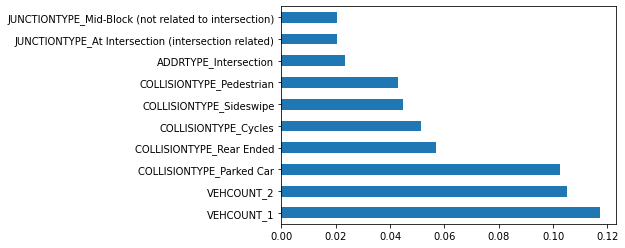

In [57]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Feature Selection on data with Categorical variables Mutual Information Feature Selection

Feature 0: 0.023072
Feature 1: 0.023976
Feature 2: 0.007163
Feature 3: 0.027231
Feature 4: 0.000688
Feature 5: 0.005999
Feature 6: 0.055062
Feature 7: 0.034297
Feature 8: 0.010980
Feature 9: 0.001156
Feature 10: 0.018433
Feature 11: 0.001922
Feature 12: 0.062243
Feature 13: 0.000584
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.047655
Feature 17: 0.007668
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.001374
Feature 21: 0.001744
Feature 22: 0.001648
Feature 23: 0.000000
Feature 24: 0.002980
Feature 25: 0.022943
Feature 26: 0.004930
Feature 27: 0.004839
Feature 28: 0.025272
Feature 29: 0.000000
Feature 30: 0.003309
Feature 31: 0.003896
Feature 32: 0.000576
Feature 33: 0.000391
Feature 34: 0.000000
Feature 35: 0.005590
Feature 36: 0.000370
Feature 37: 0.002307
Feature 38: 0.001158
Feature 39: 0.003587
Feature 40: 0.000829
Feature 41: 0.001078
Feature 42: 0.002381
Feature 43: 0.004894
Feature 44: 0.001213
Feature 45: 0.001259
Feature 46: 0.000461
Feature 47: 0.001924
Fe

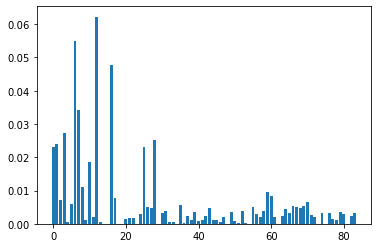

In [58]:
# feature selection
from matplotlib import pyplot
def select_features(X_train, y_train, X_test):
    fsm = SelectKBest(score_func=mutual_info_classif, k='all')
    fsm.fit(X_train, y_train)
    X_train_fsm = fsm.transform(X_train)
    X_test_fsm = fsm.transform(X_test)
    return X_train_fsm, X_test_fsm, fsm

# feature selection
X_train_fsm, X_test_fsm, fsm = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fsm.scores_)):
    print('Feature %d: %f' % (i, fsm.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fsm.scores_))], fsm.scores_)
pyplot.show()


# Logistic regression with features selected by mutual information feature selection method

In [59]:
# fit the model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fsm, y_train)
# evaluate the model
yhat1 = model.predict(X_test_fsm)
# evaluate predictions
accuracy1 = accuracy_score(y_test, yhat1)
print('Accuracy: %.2f' % (accuracy1*100))

Accuracy: 72.47


# KNN regression with features selected by mutual information feature selection method

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train_fsm, y_train)
#Evaluate the model
yhat2 = KNN_classifier.predict(X_test_fsm)
# evaluate predictions
accuracy2 = accuracy_score(y_test, yhat2)
print('Accuracy: %.2f' % (accuracy2*100))

Accuracy: 69.03


# Decision tree classifier model with features selected by mutual information feature selection method

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train_fsm, y_train)
#Evaluate the model
yhat3 = KNN_classifier.predict(X_test_fsm)
# evaluate predictions
accuracy3 = accuracy_score(y_test, yhat3)
print('Accuracy: %.2f' % (accuracy3*100))

Accuracy: 69.03


# Confusion matrix and accuracy score

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score


#1 - Logistic regression
cm_LR = confusion_matrix(y_test, yhat1)
print("Confusion matrix of Logistic Regression:")
print(model)
print("Accuracy score of logistic regression is " , accuracy_score(y_test, yhat1))

#2 - K-Nearest Neighbors (K-NN)
cm_Knn = confusion_matrix(y_test, yhat2)
print("Confusion matrix of K-NN classifier:")
print(cm_Knn)
print("Accuracy score of K-NN classifier is " , accuracy_score(y_test, yhat2))

#3 - Decision Tree
cm_DT = confusion_matrix(y_test, yhat3)
print("Confusion matrix of Decision Tree classifier:")
print(cm_DT)
print("Accuracy score of Decision Tree classifier is: " , accuracy_score(y_test, yhat3))


Confusion matrix of Logistic Regression:
LogisticRegression()
Accuracy score of logistic regression is  0.7246654699738904
Confusion matrix of K-NN classifier:
[[13035  2992]
 [ 4600  3885]]
Accuracy score of K-NN classifier is  0.6902741514360313
Confusion matrix of Decision Tree classifier:
[[13035  2992]
 [ 4600  3885]]
Accuracy score of Decision Tree classifier is:  0.6902741514360313


# Conclusion

In [ ]:
#From the results,we can conclude that logistic regression is the best model for predicting the accident severity in our dataset. 